# STA410 Week 3 Homework (4 points)

## Due 12 PM Jan 24 (before class starts)


1. **Paired or individual assignment.** Work may be shared within pairs without restriction, but collaborations beyond the pairs must be limited to "hints" and may not share complete solutions.


2. You are encouraged to adapt code you find available online **(including using AI chat bot suppport tools)** into your notebook; however, if you do so please provide a link to the utilized resource. ***If you don't and multiple students have the same answer an academic integrity proceeding may be undertaken.***  


3. **Library imports are limited** to only libraries imported in the starter code and the [standard python modules](https://docs.python.org/3/py-modindex.html). Automated code tests that fail because of additional library imports will not recieve credit. Unless a problem instructs differently you may use any functions available from the Python stdlib and the libraries imported in the starter code.


<details><summary><span style="color: blue; text-decoration: underline; cursor: pointer;">Additional Details</span></summary>

> **Do not delete, replace, or rearranged cells.** This erases `cell ids` upon which automated code tests are based. The "Edit > Undo Delete Cells" option in the notebook editor might be helpful; otherwise, redownload the notebook (so it has the correct required `cells ids`) and repopulate it with your answers (assuming you don't overwrite them when you redownload the notebook). ***You may add cells for scratch work*** but if required answers are not submitted through the provided cells where the answers are requested your answers may not be marked. Due to potential problems with `cell ids` **the only environments supported in this class are** [UofT JupyterHub](https://datatools.utoronto.ca/) or [Google Colab](https://colab.research.google.com/)
>
> **No jupyter shortcut commands** such as `! python script.py 10` or `%%timeit` may be included in the final submission as they will cause subsequent automated code tests to fail.
>
> **No cells may have any runtime errors** because this causes subsequent automated code tests to fail and you will not get marks for tests which fail because of previous runtime errors. ***Restart and re-run the cells in your notebook to ensure there are no runtime errors before submitting your work.***

</details>


In [ ]:
# you may use any functions available from the following library imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import integrate

## Student and Contribution

Are you working with a partner to complete this assignment?  
- If not, assign  the value of `None` into the variable `Partner`.
- If so, assign the name of the person you worked with into the variable `Partner`.
    - Format the name as `"<First Name> <Last Name>"` as a `str` type, e.g., "Scott Schwartz".

In [ ]:
Partner = None
# This cell will produce a runtime error until you assign a value to this variable

What was your contribution in completing the code for this assignments problems?  
Assign one of the following into each of the `Contribution` variable below.

- `"I worked alone"`
- `"I contributed more than my partner"`
- `"My partner and I contributed equally"`
- `"I contributed less than my partner"`
- `"I did not contribute"`

In [ ]:
Contribution = "I worked alone"
# This cell will produce a runtime error until you assign a value to this variable

## Part 1: Density Factorization

Do we really want uniformly random samples when not all samples are created equal? And we could go even further since Quasi Monte Carlo showed us that estimation is even more accurate when carefully using more distributionally representative samples as opposed to actually i.i.d. samples...


$$\huge \int_0^1 25e^{-10u} du$$


((2.499886500175594, 7.082434857728557e-14), 0.019117116928100586)

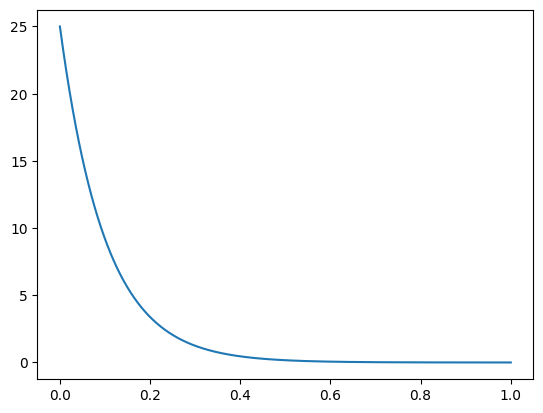

In [ ]:
import time

tik = time.time()

u_grid = np.linspace(0,1,1001)
f = lambda x: 25*np.exp(-10*x)
plt.plot(u_grid, f(u_grid));
true_val = integrate.quad(f,0,1)  # you know the drill

tok = time.time()

time_taken = tok - tik

true_val, time_taken

In [ ]:
p1q1 = "Uniform sampling based Monte Carlo Inegration here will D"
# A: Require more than n=100000 for at least three digits of accuracy
# B: Still be slower than integral approximation for three digits of accuracy
# C: Sample many parts of the function that contribute little to the integral
# D: All of the above

p1q2 = "B above is false when the dimension is greater than 5 or so"
# D*: None of A, B, or C

p1q3 = "C above is the fundamental problem when the dimension is even larger"
# D*': None of A, B, or C

p1q4 = "The law of the unconscious statistician is the unquestioning belief in C"
# A: Quadrature integral approximation
# B: Monte Carlo integral estimation
# C: E_X[f(X)] = E_Y=f(X)[Y]
# D: Integral convergence


In [ ]:

n = 1000000  # Number of Monte Carlo samples (you can change this value)

# Start timing
tik = time.time()

# Generate uniform random samples in [0, 1]
x_samples = np.random.uniform(0, 1, n)

# Evaluate the function at sampled points
f_values = f(x_samples)

# Compute the Monte Carlo estimate
# Since the interval [a, b] is [0, 1], the width (b - a) is 1
mc_estimate = (1 - 0) * np.mean(f_values)

# End timing
tok = time.time()

# Compute the time taken
time_taken = tok - tik

# Display the results
print(f"Monte Carlo estimate with n={n}: {mc_estimate:.6f}")
print(f"Time taken: {time_taken:.6f} seconds")


Monte Carlo estimate with n=1000000: 2.500664
Time taken: 0.035343 seconds


In [ ]:
# Cell for scratch work


By [the law](https://math.stackexchange.com/questions/415196/proving-the-law-of-the-unconscious-statistician) of the [unconscious statistician](https://en.wikipedia.org/wiki/Law_of_the_unconscious_statistician)

$$
\large
\begin{align*}
E_{X\sim \text{uniform}(0, 1)}\left[25e^{-10x}\right] &={} \int_0^1 5e^{-5x}\times \frac{\int_0^1 5e^{-5x}dx}{\color{blue}{\int_0^1 5e^{-5x}dx}} \color{blue}{\times 5e^{-5x}} dx\\
&={}  E_{\color{blue}{X\sim \text{truncexpon}(5, 1)}}\left[5e^{-5x}\times \int_0^1 5e^{-5x}dx\right]
\end{align*}$$


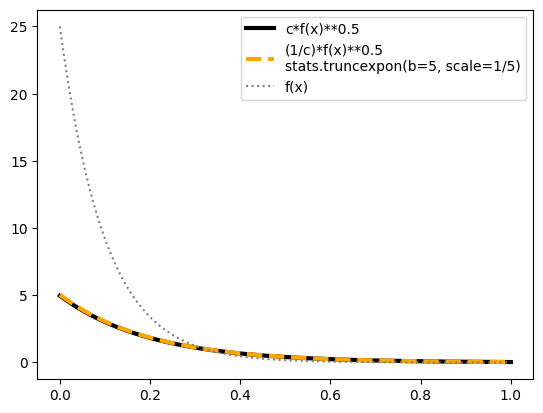

In [ ]:
sqrt_f = lambda x: 5*np.exp(-5*x)
c = stats.expon(scale=1/5).cdf(1)
plt.plot(u_grid, c*sqrt_f(u_grid), 'k', linewidth=3, label="c*f(x)**0.5")
plt.plot(u_grid, (1/c)*sqrt_f(u_grid), "--", color='orange', linewidth=3,
         label="(1/c)*f(x)**0.5\nstats.truncexpon(b=5, scale=1/5)")
plt.plot(u_grid, f(u_grid), ":", color="gray", label="f(x)")
plt.legend();

(2.1906187666025865, 2.4700910896813935, 0.9932620530009146)

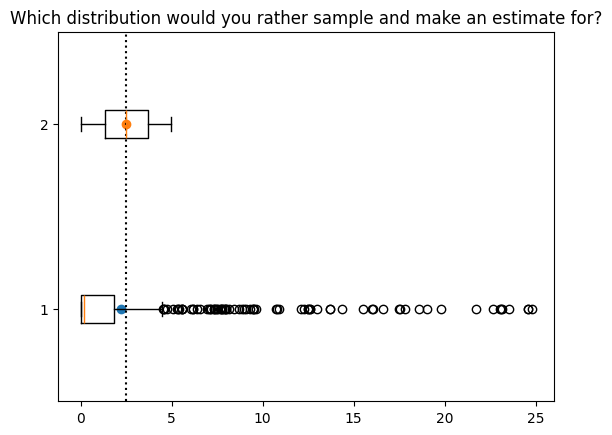

In [ ]:
n = 500
u = stats.uniform().rvs(n)
x = stats.truncexpon(b=5, scale=1/5).ppf(u)

plt.boxplot(np.array([f(u),c*sqrt_f(x)]).T, vert=False);
plt.scatter(f(u).mean(), 1)
plt.scatter(c*sqrt_f(x).mean(), 2)
plt.vlines(integrate.quad(f,0,1)[0], 0.5, 2.5, "k", linestyle=":")
plt.title("Which distribution would you rather sample and make an estimate for?");

f(u).mean(), c*sqrt_f(x).mean(), c*sqrt_f(x).mean()/sqrt_f(x).mean()

In [ ]:
p1q5 = 'The "y data" being averaged in the initial untargetted Monte Carlo '+\
       "integration estimation method is f(u)"
p1q6 = 'The "y data" being averaged in the revised targetted Monte Carlo '+\
       "integration estimation method is c*sqrt_f(x)"
p1q7 = 0.9932620530009146  # the value of c

p1q8 = "The variance of the estimator will be lower for the "+\
       'revised targetted method because the "y data" '+\
       "it samples has lower variance"

p1q9 = "B below evaluate(s) a function in proportion to that function"
# A: The initial untargetted Monte Carlo method
# B: The revised targetted Monte Carlo method
# C: Both A and B
# D: Neither A and B

p1q10 = "A above will bias against small valued function evalations"
# A: The initial untargetted Monte Carlo method
# B: The revised targetted Monte Carlo method
# C: Both A and B
# D: Neither A and B

p1q11 = "Density q which samples evaluations of strictly postive function g "+\
        "proportionally to g has proportionality c = g(x)/q(x) = B"
# A: 1
# B: \int g(x) dx
# C: 1/(\int_0^1 5e^{-5x} dx)
# D: stats.expon(scale=1/5).cdf(1)

In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just don't have scratch work cells with runtime errors because
# notebook cells are run sequentially for automated code testing.

# Any cells included for scratch work that are no longer needed may be deleted so long as
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted
#    - as this causes their `cell ids` to be lost, but these `cell-ids` are required for automated code testing.

In [ ]:
# Cell for scratch work


## Part 2: Targetting

$$\Huge \int_0^1 \frac{25e^{-10x}}{p(x)} p(x) dx$$

0.42188758248682

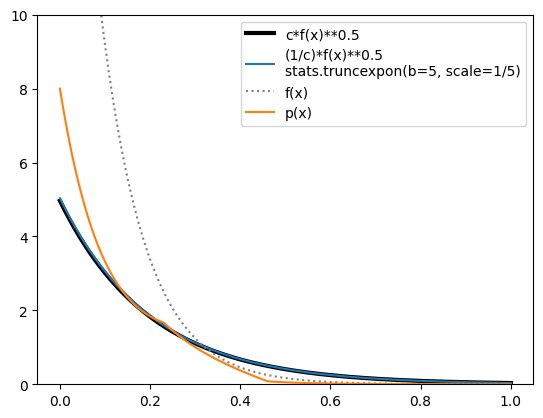

In [ ]:
f_inv = lambda y: -np.log(y/25)/10
coin_p = 0.2
λ = 10
p_pdf = lambda x,p: p*stats.triang(c=1/2, scale=2*f_inv(2.5)).pdf(x) +\
                    (1-p)*stats.truncexpon(b=λ, scale=1/λ).pdf(x)

def p_rvs(n, p=0.5):
    coin = stats.bernoulli(p=p).rvs(n)
    return stats.triang(c=1/2, scale=2*f_inv(2.5)).rvs(n)*coin + \
           stats.truncexpon(b=λ, scale=1/λ).rvs(n)*(1-coin)

plt.plot(u_grid, c*sqrt_f(u_grid), 'k', linewidth=3, label="c*f(x)**0.5")
plt.plot(u_grid, (1/c)*sqrt_f(u_grid),
         label="(1/c)*f(x)**0.5\nstats.truncexpon(b=5, scale=1/5)")
plt.plot(u_grid, f(u_grid), ":", color="gray", label="f(x)")
plt.plot(u_grid, p_pdf(u_grid, coin_p),  label="p(x)")
plt.ylim([0,λ])
plt.legend();


In [ ]:
p2q1 = 0.42188758248682  # value of u that makes f(u) equal to the area under f from 0 to 1
p2q2 = "The p(x) 'pointed proposal' samples x in the area near the value "+\
       "of u where f(x) ≈ f(u) which is equal to the area under f from 0 to 1 "+\
       "less than `stats.truncexpon(b=5, scale=1/5)`"

p2q3 = "The value of the area under f is under represented in the "+\
       "samples averaged by the Monte Carlo method based on p(x)"

p2q4 = "The estimation accuracy from least to most accurate method is based on "+\
       "p(x) -> Uniform -> `stats.truncexpon(b=5, scale=1/5)`"

p2q5 = 'The "y data" prouced by it\'s corresponding method "+\
       "from the the largest to the smallest variance is '+\
       "f(x) -> f(x)/p(x) -> `stats.expon(scale=1/5).rvs`"

p2q6 = "The shape of the f(x)/p(x) function most closely resembles a "+\
       '"M" shape'

p2q7 = "Putting the bump in p(x) "+\
       "is not the key to reduced Monte Carlo estimation variance"


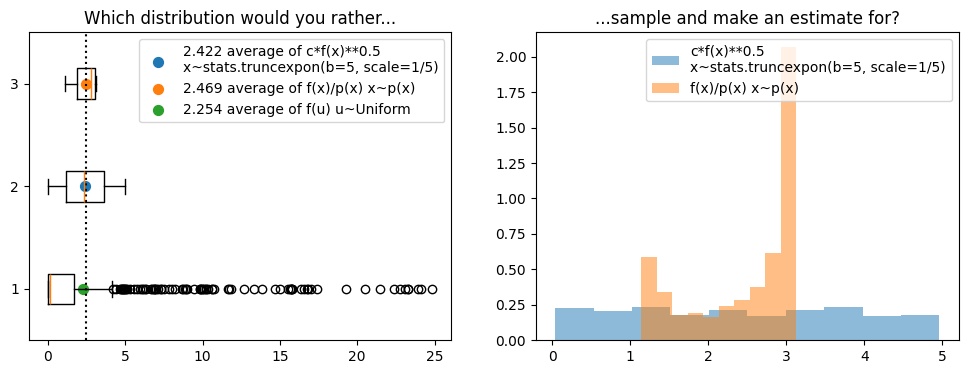

In [ ]:
n = 500
u = stats.uniform().rvs(n)
x = stats.truncexpon(b=5, scale=1/5).ppf(u)
c = stats.expon(scale=1/5).cdf(1)
x_ = p_rvs(n, coin_p)

fig,ax = plt.subplots(1,2, figsize=(12,4))
ax[0].boxplot(np.array([f(u), c*sqrt_f(x),
                        f(x_)/p_pdf(x_,coin_p)]).T, vert=False);
ax[0].scatter(c*sqrt_f(x).mean(), 2, s=50,
              label="%.3f average of c*f(x)**0.5\nx~stats.truncexpon(b=5, scale=1/5)"%(c*sqrt_f(x).mean()))
ax[0].scatter((f(x_)/p_pdf(x_,coin_p)).mean(), 3, s=50,
              label="%.3f average of f(x)/p(x) x~p(x)"%(f(x_)/p_pdf(x_,coin_p)).mean())
ax[0].scatter(f(u).mean(), 1, s=50,
              label="%.3f average of f(u) u~Uniform"%f(u).mean())
ax[0].vlines(integrate.quad(f,0,1)[0], 0.5, 3.5, "k", linestyle=":")
ax[0].set_title("Which distribution would you rather...")
ax[0].legend()

ax[1].hist(c*sqrt_f(x), density=True, alpha=0.5,
           label="c*f(x)**0.5\nx~stats.truncexpon(b=5, scale=1/5)")
ax[1].hist(f(x_)/p_pdf(x_,coin_p), density=True, alpha=0.5,
           label="f(x)/p(x) x~p(x)")
ax[1].set_title("...sample and make an estimate for?")
ax[1].legend();

In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just don't have scratch work cells with runtime errors because
# notebook cells are run sequentially for automated code testing.

# Any cells included for scratch work that are no longer needed may be deleted so long as
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted
#    - as this causes their `cell ids` to be lost, but these `cell-ids` are required for automated code testing.

In [ ]:
integrate.quad(f,0,1)
f_inv(0.36787944117144256)

stats.truncexpon(b=5, scale=1/5)


## Part 2: Targetting?

$$\huge \int_0^1 \frac{25e^{-10x}}{q(x)} q(x) dx \quad \textrm{ and } \quad q(x) \propto \overset{25e^{-10x}}{f(x)}$$

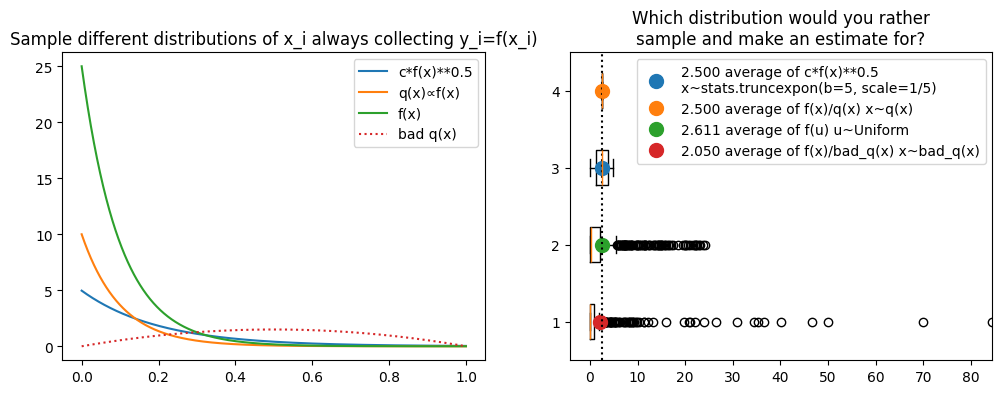

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,4))

q = stats.truncexpon(b=10, scale=1/10)
q_bad = stats.beta(2,2)

ax[0].plot(u_grid, c*sqrt_f(u_grid), label="c*f(x)**0.5")
ax[0].plot(u_grid, q.pdf(u_grid), label="q(x)∝f(x)")
ax[0].plot(u_grid, f(u_grid), label="f(x)")
ax[0].plot(u_grid, q_bad.pdf(u_grid), ':', label="bad q(x)")
ax[0].set_title("Sample different distributions of x_i always collecting y_i=f(x_i)")
ax[0].legend()

n = 500
u = stats.uniform().rvs(n)
x = stats.truncexpon(b=5, scale=1/5).ppf(u)
x_ = q.ppf(u)
x_x = q_bad.ppf(u)

y1 = f(x_x)/q_bad.pdf(x_x)
y2 = f(u)
y3 = c*sqrt_f(x)
y4 = f(x_)/q.pdf(x_)

ax[1].boxplot(np.array([y1, y2, y3, y4]).T, vert=False);
ax[1].plot(y3.mean(), 3, '.', markersize=20, label="%.3f average of c*f(x)**0.5\nx~stats.truncexpon(b=5, scale=1/5)"%y4.mean())
ax[1].plot(y4.mean(), 4, '.', markersize=20, label="%.3f average of f(x)/q(x) x~q(x)"%y4.mean())
ax[1].plot(y2.mean(), 2, '.', markersize=20, label="%.3f average of f(u) u~Uniform"%y2.mean())
ax[1].plot(y1.mean(), 1, '.', markersize=20, label="%.3f average of f(x)/bad_q(x) x~bad_q(x)"%y1.mean())
ax[1].vlines(integrate.quad(f, 0, 1)[0], 0.5, 4.5, "k", linestyle=":")
ax[1].set_title("Which distribution would you rather\nsample and make an estimate for?");
ax[1].legend()

cutoff = y1.max()  # some other value?
ax[1].set_xlim([plt.xlim()[0], cutoff]);

In [ ]:
# For the following questions assume that \int g(x) dx exists but is unknown
p2q8 = "The range of the evaluations of g(x) for a sample x drawn "+\
       "prortionally to g itself will results in a range of values "+\
       "about the same as the range of g itself"
p2q9 = "The evaluations of g(x)/q(x) when sampled from q proportional "+\
       "to g have are equal to \int g(x) dx"


In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just don't have scratch work cells with runtime errors because
# notebook cells are run sequentially for automated code testing.

# Any cells included for scratch work that are no longer needed may be deleted so long as
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted
#    - as this causes their `cell ids` to be lost, but these `cell-ids` are required for automated code testing.

In [ ]:
# Cell for scratch work
